Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 2**: The code in the cell below has errors. There are errors in style and errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end and achieves a 10 out of 10 marks from the style checker. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder. The code checking should then improve your style mark.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct.

**Note B**: Make sure you use the `pylintrc` file from Moodle for style checking (keep it in the same folder as your python file in Spyder so that style checking in Spyder automatically uses it as configuration file).

**Note C**: Copy your final solution back into the cell below so that the tests can run.

True values: amplitude = 2.5; decay = 1.3; constant = 0.5
Best fit parameter:  2.795265613628212  ; 1.5196157165831823  ; 0.544863839763501
Fit errors:  0.1903577373111912  ; 0.20890246585849764  ; 0.07017959997997712


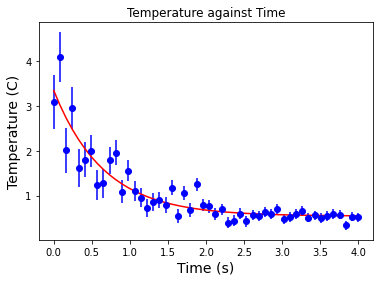

In [1]:
'''
Script:
Demonstrate the curve_fit function from SciPy.

This example contains faults but also one physics blunder!
'''

from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
# import only curve_fit
import matplotlib.pyplot as plt

def fitFunc(time, amplitude, decay, constant):
    '''Our function that we want to fit'''
    return amplitude * np.exp(-decay * time) + constant


# produce artificial data first from the function
x = np.linspace(0, 4, 50)
t = fitFunc(x, 2.5, 1.3, 0.5)

# add noise to the data using random numbers
noisy = t + 0.2 * t * np.random.normal(size=len(t))

# invoke the scipy function
# fit the noisy data
results = curve_fit(fitFunc, x, noisy)
fitParams = results[0]
fitErrors = results[1]

print('True values: amplitude = 2.5; decay = 1.3; constant = 0.5')
print('Best fit parameter: ', fitParams[0], ' ;', fitParams[1], ' ;',
      fitParams[2])
print('Fit errors: ', sqrt(fitErrors[0, 0]), ' ;', sqrt(fitErrors[1, 1]), ' ;',
      sqrt(fitErrors[2, 2]))

# plot the noisy data and the fit result together
plt.title('Temperature against Time')
plt.ylabel('Temperature (C)', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.errorbar(x, noisy, fmt='bo', yerr=0.2*t)
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]), 'r-')
plt.show()


In [2]:
# test
assert (fitFunc(0.0, 1.0, 1.0, 0.0) > 0.0)

### Tests - 1 mark; Style - 1 mark; Plot - 1 mark